In [10]:
import netCDF4
from pathlib import Path

patch = netCDF4.Dataset(Path(r'C:\Users\npatel23\Desktop\Untitled Folder\Approach 2\dataset\netcdf\31TBF\2020_31TBF_patch_18_12.nc'), 'r')
patch

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: S4A Patch Dataset
    authors: Papoutsis I., Sykas D., Zografakis D., Sdraka M.
    patch_full_name: 2020_31TBF_patch_18_12
    patch_year: 2020
    patch_name: patch_18_12
    patch_country_code: ES
    patch_tile: 31TBF
    creation_date: 27 Apr 2021
    references: Documentation available at .
    institution: National Observatory of Athens.
    version: 21.03
    _format: NETCDF4
    _nco_version: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    _xarray_version: 0.17.0
    dimensions(sizes): 
    variables(dimensions): 
    groups: B01, B02, B03, B04, B05, B06, B07, B08, B09, B10, B11, B12, B8A, labels, parcels

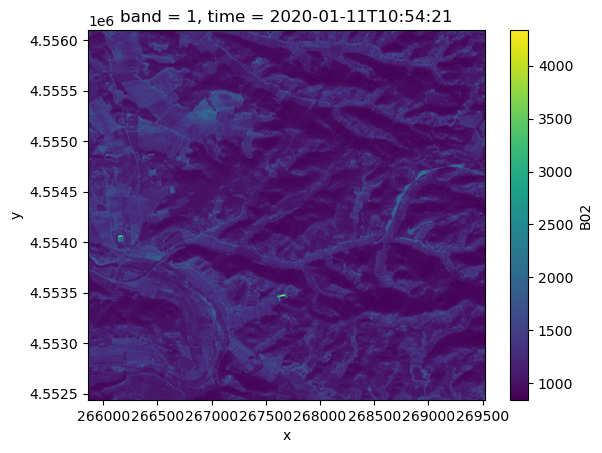

In [11]:
import xarray as xr

band_data = xr.open_dataset(xr.backends.NetCDF4DataStore(patch['B02']))
band_data.B02.isel(time=0).plot()

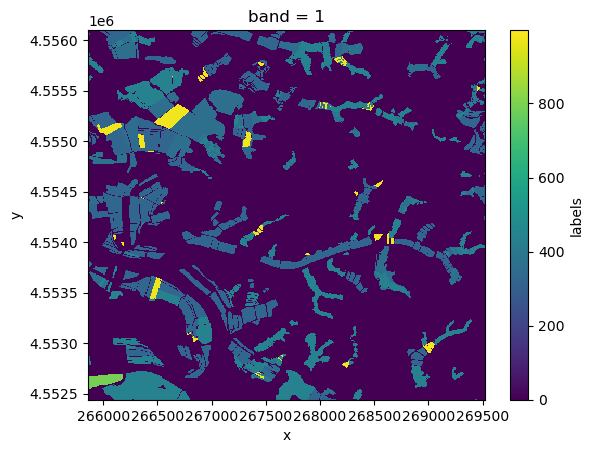

In [12]:
labels = xr.open_dataset(xr.backends.NetCDF4DataStore(patch['labels']))
labels.labels.plot()

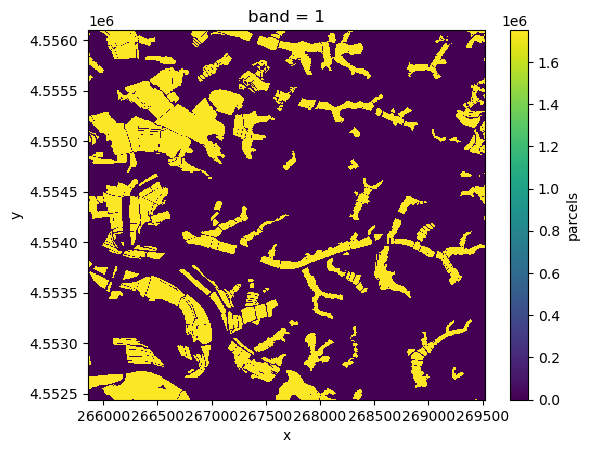

In [13]:
parcels = xr.open_dataset(xr.backends.NetCDF4DataStore(patch['parcels']))
parcels.parcels.plot()

In [15]:
import pandas as pd
# Or maybe aggregate based on a given frequency
# Refer to
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
group_freq = '1MS'

# Grab year from netcdf4's global attribute
year = patch.patch_year

# output intervals
date_range = pd.date_range(start=f'{year}-01-01', end=f'{int(year) + 1}-01-01', freq=group_freq)

# Aggregate based on given frequency
band_data = band_data.groupby_bins(
    'time',
    bins=date_range,
    right=True,
    include_lowest=False,
    labels=date_range[:-1]
).median(dim='time')

print(band_data.B02)



for i, season in enumerate(band_data.B02):

    ax = axes.flat[i]
    cax = band_data.B02.isel(time_bins=i).plot(ax=ax)


for i, ax in enumerate(axes.flat):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Month: {i+1}')


plt.tight_layout()
plt.show()


KeyError: 'time'

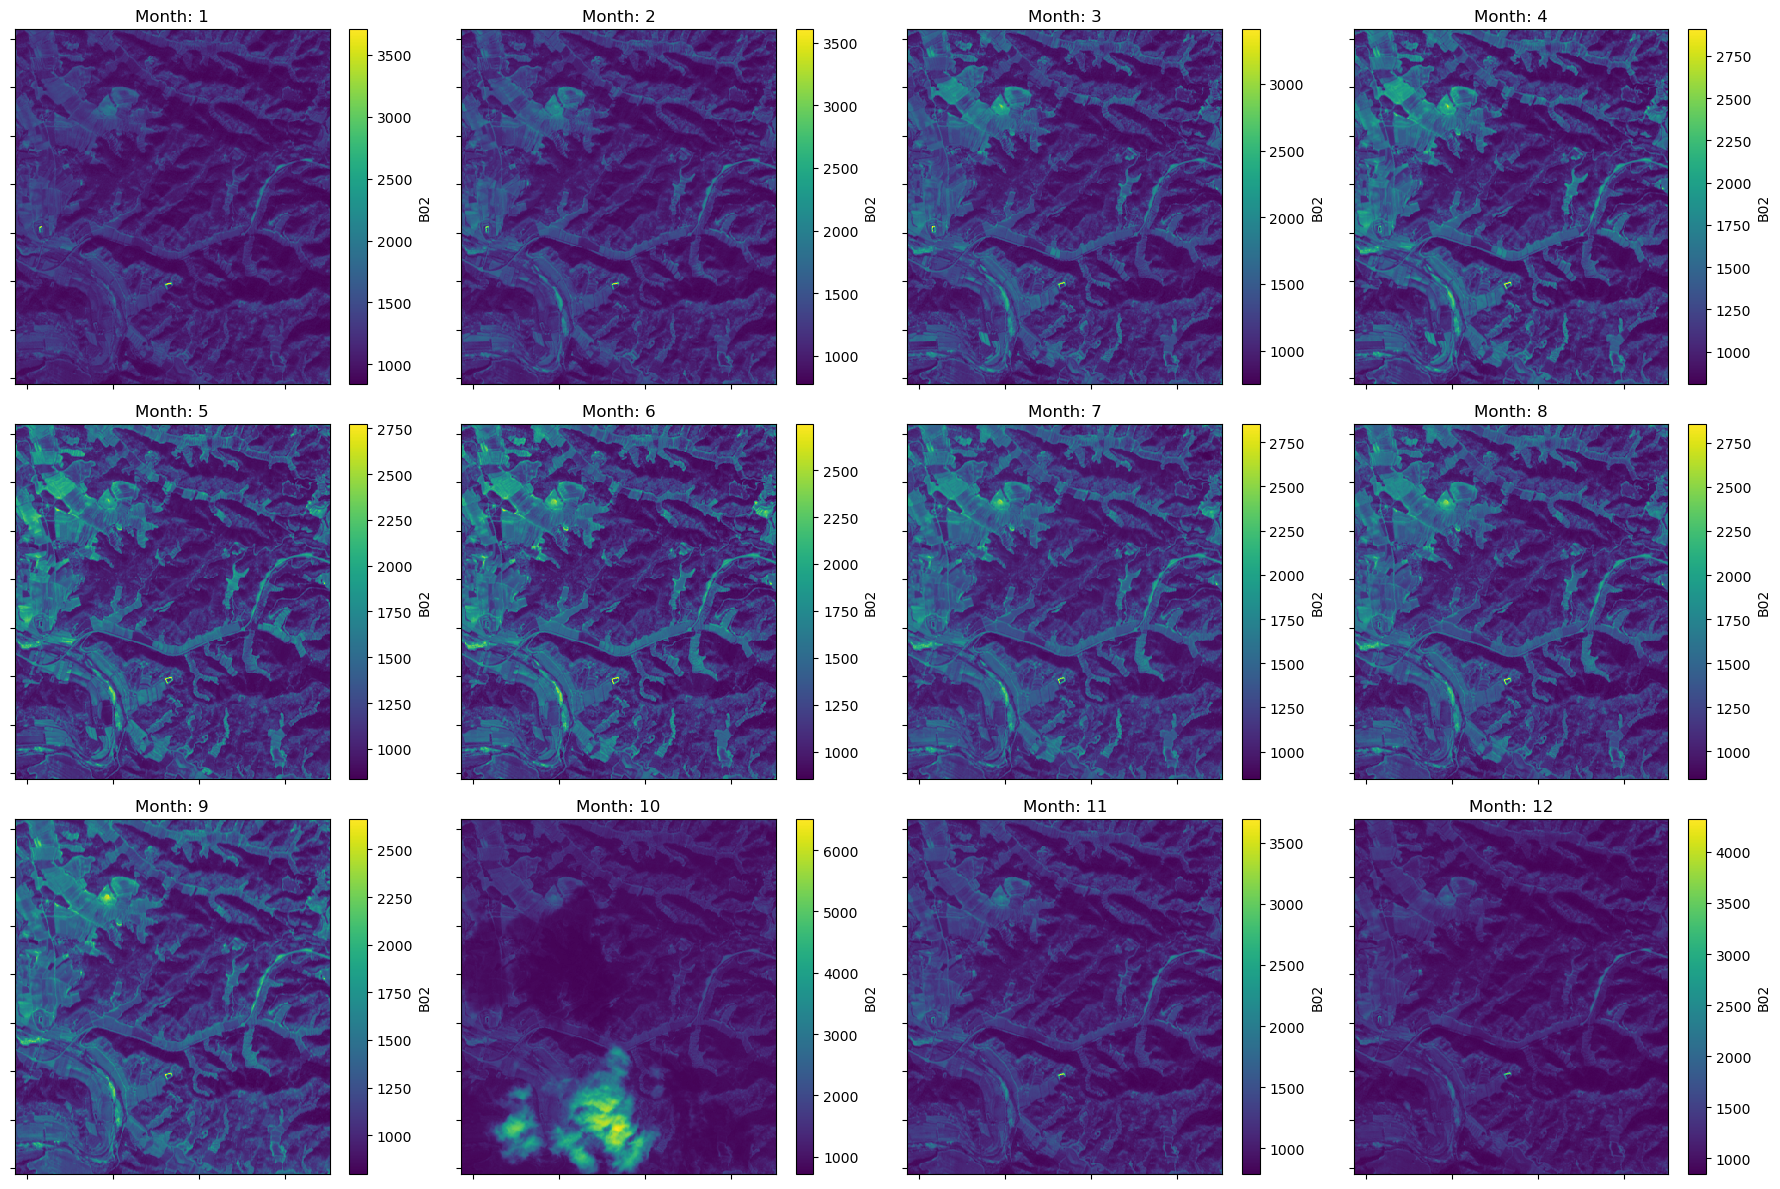

In [6]:
import matplotlib.pyplot as plt

band_data = band_data.interpolate_na(dim='time_bins', method='linear', fill_value='extrapolate')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, season in enumerate(band_data.B02):

    ax = axes.flat[i]
    cax = band_data.B02.isel(time_bins=i).plot(ax=ax)


for i, ax in enumerate(axes.flat):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Month: {i+1}')


plt.tight_layout()
plt.show()